# Brief Analysis of the Millennial Experience 

In [ ]:
# getting the needed libraries 
import pandas as pd
import os 
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Population 

How many people make up the Millennial Generation (1981-1996)? Let's look at some Census data for the answer.
This dataset goes up to 2023 so we'll count up the individuals from ages 27 to 42. 

In [31]:
#Read and clean Census dataset

df_pop = pd.read_csv('data_files/01-Annual Estimates of the Resident Population by Age and Sex 2020-2023.csv')
df_pop = df_pop.rename(columns={'POPESTIMATE2020':'~Population 2020', 'POPESTIMATE2021':'~Population 2021', 'POPESTIMATE2022':'~Population 2022', 'POPESTIMATE2023':'~Population 2023'})
df_pop = df_pop.drop(columns=['ESTIMATESBASE2020','SEX'])

#Find Total Population of Millenials age 27 thru 42

all_mill = df_pop.iloc[27:43]
print(all_mill)

    AGE  ~Population 2020  ~Population 2021  ~Population 2022  \
27   27           4552156           4484117           4415055   
28   28           4658360           4557253           4507907   
29   29           4729513           4662407           4580635   
30   30           4745535           4732872           4684114   
31   31           4612941           4747555           4752768   
32   32           4533991           4614600           4765119   
33   33           4485388           4534312           4630396   
34   34           4497154           4484944           4547725   
35   35           4495335           4495424           4495746   
36   36           4402903           4492542           4504254   
37   37           4469938           4399455           4499384   
38   38           4464033           4465322           4404545   
39   39           4400611           4458168           4468376   
40   40           4381528           4393776           4458551   
41   41           4203064

In [32]:
#Total number of millienials as of 2023

all_mill_2023 = all_mill['~Population 2023'].sum()
print(f"There are {all_mill_2023:,d} millenials in the US")

There are 72,704,750 millenials in the US


So we see there are approximately 72.7 million people in the US born in that generation. That's about 21% of the country. 

## Finance 

### In this section we'll look into the financial reality during the Millennial years. 



### Debt 

The Federal Reserve Bank of New York tracks the total debt balance of Americans over time.
We can break this data down be age groups and focus on the years 1999 to 2024.

In [33]:
#Read and clean Debt (in trillions) data starting in 1999 

df_debt = pd.read_excel('data_files/02-Household Debt and Credit Report 2024.xlsx', sheet_name='Page 20 Data')
df_debt.head()

,Year,18-29,30-39,40-49,50-59,60-69,70+
0,99:Q1,0.3519,1.221,1.461,0.9779,0.3755,0.1784
1,99:Q2,0.3735,1.264,1.494,1.0040,0.3798,0.1809
2,99:Q3,0.4151,1.330,1.540,1.0240,0.3815,0.1778
3,99:Q4,0.4309,1.333,1.525,1.0000,0.3740,0.1763
4,00:Q1,0.3879,1.349,1.639,1.1290,0.4269,0.2119


We'll use the Fed dataset to visualize debt of that 18 to 29 year range. 

In [34]:
#define x and y for our plot
y = df_debt.drop(df_debt.columns[0], axis=1)
x = df_debt[['Year']]

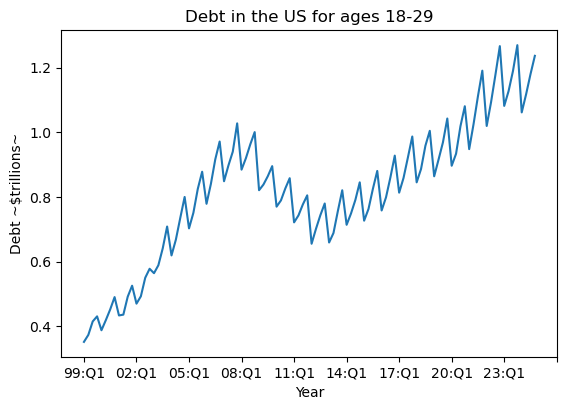

In [35]:
# plot the increase in debt over time

plt.figure()
plt.plot(x['Year'] , y['18-29'])
plt.xlabel("Year")  
plt.ylabel("Debt ~$trillions~")
plt.title("Debt in the US for ages 18-29") 
plt.xticks(np.arange(0,110, step=12)) 
plt.subplots_adjust(bottom=0.2)
plt.show()

Unfortunately, we see that young people are in a lot of debt in the US 

### Income

Here we'll look at how income has changed over time. We'll use data from the US Census again and visualize the trend. 

In [36]:
df_inc = pd.read_excel('data_files/03-Household Income 2023.xlsx')
df_inc.head()

,Year,Total (thousands),Percent distribution (Total),"Under $15,000","$15,000 \nto\n $24,999","$25,000 \nto\n $34,999","$35,000 \nto\n $49,999","$50,000 \nto\n $74,999","$75,000 \nto\n $99,999","$100,000 \nto\n $149,999","$150,000 \nto\n $199,999","$200,000 and over",Median income\n(dollars),Margin of error2 (±),Mean Income,Margin of error2 (±).1
0,2023,132200,100,7.4,6.7,6.9,10.3,15.7,12.1,17.0,9.5,14.4,80610,634,114500,1098
1,2022,131400,100,8.1,7.2,7.4,10.4,15.9,12.2,16.7,9.3,12.9,77540,1006,110600,1075
2,2021,131200,100,8.1,7.4,7.2,9.9,15.3,11.9,16.4,9.3,14.4,79260,678,114600,1153
3,2020,129200,100,7.6,7.4,6.8,10.6,15.2,12.3,16.5,9.3,14.2,79560,1030,114000,1227
4,2019,128500,100,7.3,7.0,6.7,10.6,15.5,11.9,17.1,9.4,14.6,81210,1069,115900,1232


In [37]:
#define x and y
y2 = df_inc[['Mean Income']]
x2 = df_inc[['Year']]

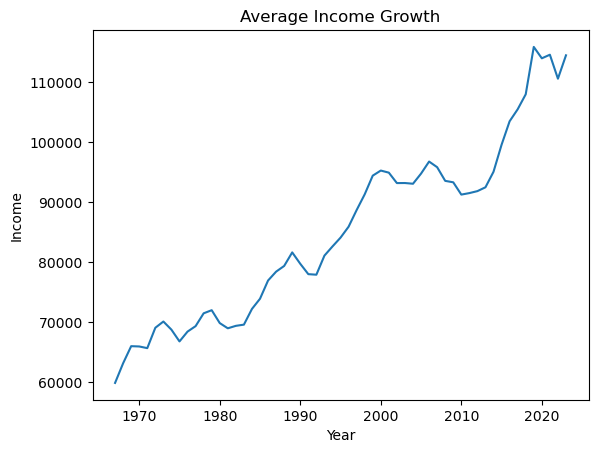

In [38]:
#plot the median household income over time
plt.figure()
plt.plot(x2, y2)
plt.xlabel("Year")  
plt.ylabel("Income")
plt.title("Average Income Growth") 
plt.show()

We do see a fairly steady increase in the household income of Americans. But also see those dips mark notable financial hardships throughout
our history. The Great Recession from 2007 to 2009 being most prominent in this graph. 

## Employment 

### Next, we'll loook at job trends. The Bureau of Labor Statistics provides information for us to examine. We'll visualize the Labor Force Participation Rate (LFPR) over time. LFPR is a percentage that looks at how much of the population has a job or is looking for a job. 

In [39]:
df_jobs = pd.read_excel('data_files/04-Employment status of the civilian noninstitutional population 1950s to 2024.xlsx')
print(df_jobs[['Year', 'Labor Force Participation Rate']])

    Year  Labor Force Participation Rate
0   1954                            58.8
1   1955                            59.3
2   1956                            60.0
3   1957                            59.6
4   1958                            59.5
..   ...                             ...
66  2020                            61.7
67  2021                            61.7
68  2022                            62.2
69  2023                            62.6
70  2024                            62.6

[71 rows x 2 columns]


Let's create one more chart. 

In [40]:
#define x and y 

y3 = df_jobs[['Labor Force Participation Rate']]
x3 = df_jobs[['Year']]

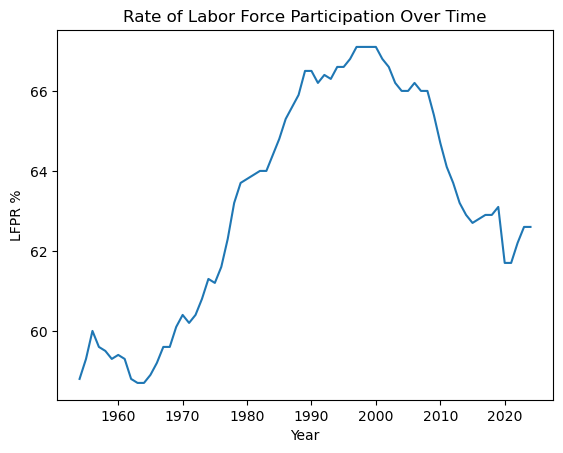

In [41]:
#chart labor particiation rate over time
plt.figure()
plt.plot(x3, y3)
plt.xlabel("Year")  
plt.ylabel("LFPR %")
plt.title("Rate of Labor Force Participation Over Time") 
plt.show()

We see that labor participation consistently stays within that 60-65% range. However we can see again those drops. 
These declines happen in the years Millennials would be in their 20s and 30s. 

## Family 

### Let's look at some of the social aspects of Millennial life. We'll merge two datasets from the CDC to look at rates of marriage and rates of childbirth from 2010 to 2022. 

In [44]:
# Marriage data

df_marr = pd.read_excel('data_files/07-Marriage Rates 2000-2023.xlsx')
df_marr.head()

,Year,Marriages,Population,"Rate per 1,000 total population"
0,2022,2065905,333287557,6.2
1,2021,1985072,331893745,6.0
2,2020,1676911,329484123,5.1
3,2019,2015603,328239523,6.1
4,2018,2132853,327167434,6.5


In [45]:
# Birth rate data
df_birth = pd.read_csv('data_files/08-Birth Rates 2010-2022.csv')
df_birth.head()

,Year,Number of Births,Total Birth Rate,Fertility Rate,Total Fertility Rate,Age 10-14,Age 15-17,Age 18-19,Age 20-24,Age 25-29,Age 30-34,Age 35-39,Age 40-44,Age 45-49
0,2022,3667758,11.0,56.0,"1,656.50",0.2,5.6,25.8,57.5,93.5,97.5,55.3,12.6,1.1
1,2021,3664292,11.0,56.3,"1,664.00",0.2,5.6,26.6,61.5,93.0,97.6,5.7,12.0,0.9
2,2020,3613647,10.9,55.7,"1,641.50",0.2,6.1,28.2,63.3,90.9,94.9,51.3,11.8,0.9
3,2019,3747540,11.4,58.3,"1,706.00",0.2,6.7,31.1,66.6,93.7,98.3,52.8,12.0,0.9
4,2018,3791712,11.6,59.1,"1,729.50",0.2,7.2,32.3,68.0,95.3,99.7,52.6,11.8,0.9


In [46]:
#merge marriage and birth rate tables

marriage_and_birth_rate = pd.merge(df_marr, df_birth, on='Year', how='inner')
marriage_and_birth_rate.head()


,Year,Marriages,Population,"Rate per 1,000 total population",Number of Births,Total Birth Rate,Fertility Rate,Total Fertility Rate,Age 10-14,Age 15-17,Age 18-19,Age 20-24,Age 25-29,Age 30-34,Age 35-39,Age 40-44,Age 45-49
0,2022,2065905,333287557,6.2,3667758,11.0,56.0,"1,656.50",0.2,5.6,25.8,57.5,93.5,97.5,55.3,12.6,1.1
1,2021,1985072,331893745,6.0,3664292,11.0,56.3,"1,664.00",0.2,5.6,26.6,61.5,93.0,97.6,5.7,12.0,0.9
2,2020,1676911,329484123,5.1,3613647,10.9,55.7,"1,641.50",0.2,6.1,28.2,63.3,90.9,94.9,51.3,11.8,0.9
3,2019,2015603,328239523,6.1,3747540,11.4,58.3,"1,706.00",0.2,6.7,31.1,66.6,93.7,98.3,52.8,12.0,0.9
4,2018,2132853,327167434,6.5,3791712,11.6,59.1,"1,729.50",0.2,7.2,32.3,68.0,95.3,99.7,52.6,11.8,0.9


In [47]:
# Make sure columns are numer for calculation

marriage_and_birth_rate['Number of Births'] = pd.to_numeric(marriage_and_birth_rate['Number of Births'])
marriage_and_birth_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             11 non-null     int64  
 1   Marriages                        11 non-null     int64  
 2   Population                       11 non-null     int64  
 3   Rate per 1,000 total population  11 non-null     float64
 4   Number of Births                 11 non-null     int64  
 5   Total Birth Rate                 11 non-null     float64
 6   Fertility Rate                   11 non-null     float64
 7   Total Fertility Rate             11 non-null     object 
 8   Age 10-14                        11 non-null     float64
 9   Age 15-17                        11 non-null     float64
 10  Age 18-19                        11 non-null     float64
 11  Age 20-24                        11 non-null     float64
 12  Age 25-29               

In [48]:
# add column to dataset. Marriage total divided by birth total

marriage_and_birth_rate['Marriages per Number of Births'] = marriage_and_birth_rate['Marriages']/marriage_and_birth_rate['Number of Births']
print(marriage_and_birth_rate[['Year','Marriages per Number of Births']])

    Year  Marriages per Number of Births
0   2022                        0.563261
1   2021                        0.541734
2   2020                        0.464049
3   2019                        0.537847
4   2018                        0.562504
5   2017                        0.580079
6   2016                        0.570573
7   2015                        0.558397
8   2012                        0.539106
9   2011                        0.535716
10  2010                        0.524080


We see that there aren't a lot of marriages happening relative to the population, but we're still having babies. 
Marriages to births are about 1:2 according to our data. 

## Conclusion

#### This is just small look into what the Millennial Generation has dealt with over the years. To end, we'll look at the US economy as a whole over time. This data comes to us from the World Bank. Thank you for getting this far. 



For this analysis, the GDP 'growth' for 2009 and 2020 really speak for themselves. Some the most 
challenging years in US economic history. The Millenials won't be young for much longer and will have to 
take on the task of caring for the next generation. Hopefully things go a bit smoother for Gen Z. 

In [49]:
df_gdp = pd.read_csv('data_files/10-America GDP.csv')
print(df_gdp)

    Year  GDP growth (annual %)
0   1960               0.000000
1   1961               2.300000
2   1962               6.100000
3   1963               4.400000
4   1964               5.800000
..   ...                    ...
59  2019               2.583825
60  2020              -2.163029
61  2021               6.055053
62  2022               2.512375
63  2023               2.887556

[64 rows x 2 columns]


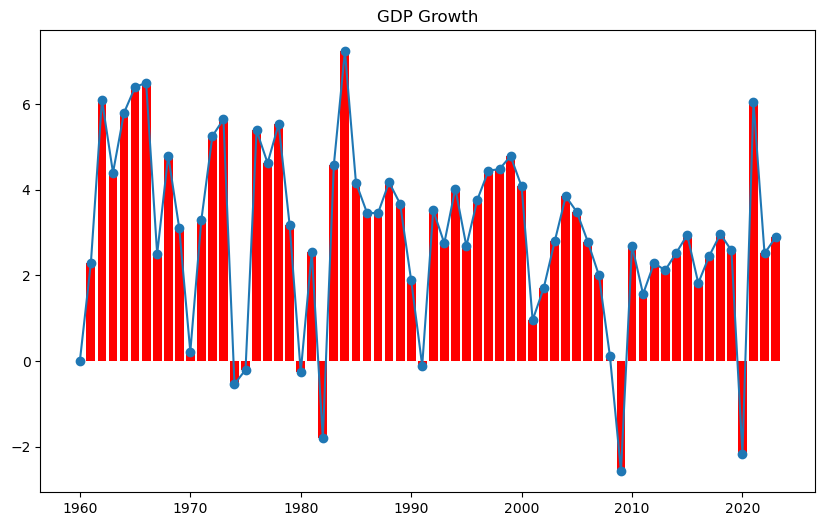

In [53]:
fig, ax = plt.subplots(figsize= (10, 6))
ax.bar(df_gdp['Year'], df_gdp['GDP growth (annual %)'], label = 'GDP', color='red')
ax.plot(df_gdp['Year'], df_gdp['GDP growth (annual %)'], marker ='o')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('GDP Growth')
plt.show()